#### **Name: Angad Gupta**
#### **Enroll No: 21SOECE11614**
#### **Roll No: 14**|

### **Implement CNN with MNIST dataset.**

### **Import necessary libraries**

In [1]:
# 1. Import necessary libraries
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist  # For loading the MNIST dataset
from tensorflow.keras.models import Sequential  # To create a Sequential model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten  # Layers for CNN
from tensorflow.keras.utils import to_categorical  # To one-hot encode labels
import matplotlib.pyplot as plt  # For plotting

### **Load the MNIST Datasets**

In [2]:
# 2. Load the MNIST Datasets
# Load the MNIST dataset which is divided into training and testing sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
# 3. Reshape and normalize the data
# Reshape images to (28, 28, 1) for compatibility with Conv2D
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

# Convert pixel values to floats and normalize by dividing by 255
X_train = X_train.astype("float32") / 255.0
X_test = X_test.astype("float32") / 255.0

# One-hot encode the labels for 10 classes (digits 0-9)
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [4]:
# 4. Print the shape of data to verify
print(f"Train Data shape: {X_train.shape} and Training label shape: {y_train.shape}")
print(f"Test Data shape: {X_test.shape} and Testing label shape: {y_test.shape}")

Train Data shape: (60000, 28, 28, 1) and Training label shape: (60000, 10)
Test Data shape: (10000, 28, 28, 1) and Testing label shape: (10000, 10)


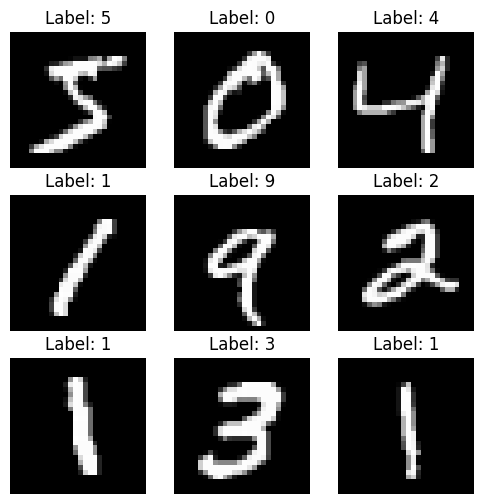

In [5]:
# 5. Plot the first 9 images from the training dataset
# This will visualize a 3x3 grid of images from the training dataset
plt.figure(figsize=(6, 6))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(X_train[i].reshape(28, 28), cmap="gray")  # Show images in grayscale
    plt.title(f"Label: {np.argmax(y_train[i])}")  # Display the actual digit (label)
    plt.axis("off")  # Hide axes for better visualization
plt.show()

### **Build CNN Model**

- Conv2D : 32 filters, size = 3 * 3. Relu

- maxPoling : 2 * 2, stride = 2

In [6]:
# 6. Build a Convolutional Neural Network (CNN) model
# Initialize a Sequential model
model = Sequential()

# Add the first convolutional layer with 32 filters and 3x3 kernel size, followed by ReLU activation
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation="relu", input_shape=(28, 28, 1)))

# Add a MaxPooling layer to downsample the feature maps (2x2 pooling)
model.add(MaxPooling2D(pool_size=(2, 2)))

# Add a second convolutional layer with 64 filters and 3x3 kernel size, followed by ReLU activation
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation="relu"))

# Add a MaxPooling layer to further downsample (2x2 pooling)
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten the output from the convolutional layers to connect to fully connected layers
model.add(Flatten())

# Add a fully connected layer with 128 units and ReLU activation
model.add(Dense(units=128, activation="relu"))

# Add the output layer with 10 units (one for each digit) and softmax activation
model.add(Dense(units=10, activation="softmax"))  # Softmax for multi-class classification

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
# 7. Compile the model
# Use Adam optimizer and categorical crossentropy for multi-class classification
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

In [8]:
# 8. Print the model summary
# This will show the architecture and the number of parameters in each layer
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         204,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

In [9]:
# 9. Train the model
# Train the model on the training data, with validation on the test data
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - accuracy: 0.9041 - loss: 0.3045 - val_accuracy: 0.9835 - val_loss: 0.0479
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9864 - loss: 0.0451 - val_accuracy: 0.9847 - val_loss: 0.0469
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9907 - loss: 0.0299 - val_accuracy: 0.9897 - val_loss: 0.0305
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9940 - loss: 0.0193 - val_accuracy: 0.9911 - val_loss: 0.0263
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9956 - loss: 0.0144 - val_accuracy: 0.9913 - val_loss: 0.0273
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9963 - loss: 0.0108 - val_accuracy: 0.9896 - val_loss: 0.0350
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9969 - loss: 0.0099 - val_accuracy: 0.9898 - val_loss: 0.0367
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9975 - loss: 0.0073 

In [10]:
# 10. Evaluate the model on the test set
# Evaluate the model to get the loss and accuracy on the test data
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test accuracy: {test_accuracy:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9889 - loss: 0.0484
Test accuracy: 0.9910


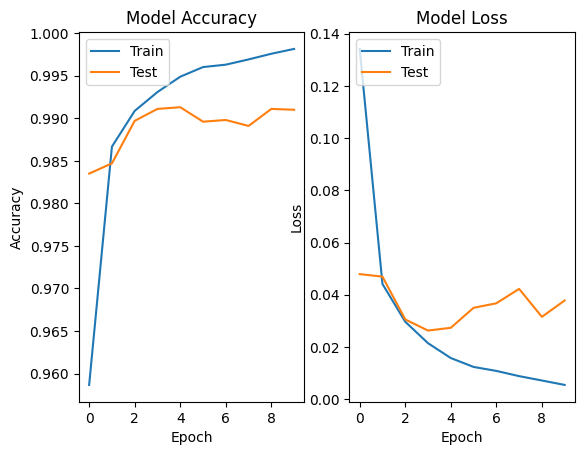

In [11]:
# 11. Visualize training accuracy and loss
# Plot the training accuracy and validation accuracy over epochs
plt.subplot(1, 2, 1)
plt.plot(history.history["accuracy"], label="Train Accuracy")
plt.plot(history.history["val_accuracy"], label="Test Accuracy")
plt.title("Model Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend(["Train", "Test"], loc="upper left")

# Plot the training loss and validation loss over epochs
plt.subplot(1, 2, 2)
plt.plot(history.history["loss"], label="Train Loss")
plt.plot(history.history["val_loss"], label="Test Loss")
plt.title("Model Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(["Train", "Test"], loc="upper left")

# Show the plots
plt.show()